# Impedance Data Analysis

### 1 - Import required libraries and data for analysis

In [2]:
#Import libraries
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

In [3]:
#Read in the data
transfer = pd.read_csv("transfer.csv", header=None)

### 2 - Initial data exploration

In [4]:
#Check data is correct
transfer.head

<bound method NDFrame.head of          0     1      2
0      400    30 -97.39
1      410    30  -2.45
2      420    30 -38.06
3      430    30 -22.30
4      440    30   2.94
...    ...   ...    ...
8595  2350  1290 -21.26
8596  2360  1290 -21.64
8597  2370  1290 -22.45
8598  2380  1290 -22.23
8599  2390  1290 -21.55

[8600 rows x 3 columns]>

In [5]:
#Sort dataframe by the 5 highest and lowest values for impedance difference
transfer.sort_values(by=[2])

,0,1,2
7000,400,1080,-190.35
1400,400,240,-150.55
1078,1180,180,-136.48
2878,1180,450,-130.92
3078,1180,480,-129.03
...,...,...,...
7440,800,1140,94.41
7640,800,1170,95.34
7040,800,1080,96.74
7240,800,1110,97.02


In [6]:
#Sort dataframe by the 10 lowest values for impedance difference
transfer.sort_values(by=[2]).head(10)

,0,1,2
7000,400,1080,-190.35
1400,400,240,-150.55
1078,1180,180,-136.48
2878,1180,450,-130.92
3078,1180,480,-129.03
878,1180,150,-128.78
5678,1180,870,-127.83
4468,1080,690,-125.14
2678,1180,420,-123.07
3278,1180,510,-119.93


In [6]:
#Sort dataframe by the 10 highest values for impedance difference
transfer.sort_values(by=[2], ascending=False).head(10)

,0,1,2
8440,800,1290,99.81
7240,800,1110,97.02
7040,800,1080,96.74
7640,800,1170,95.34
7440,800,1140,94.41
6840,800,1050,93.86
8240,800,1260,92.92
8040,800,1230,88.28
7840,800,1200,88.21
6040,800,930,84.22


### 3 - Plot data in two dimensions

Text(0.5, 1.0, 'Scatter plot showing impedance difference against frequency')

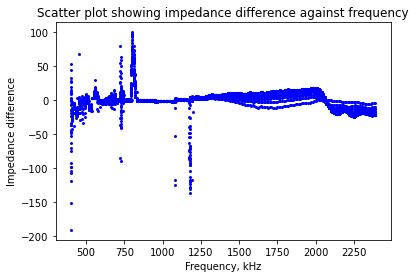

In [7]:
#Select columns in dataframe for x and y axes to generate a 2D scatter graph, and specify graph design
plt.scatter(transfer[0], transfer[2], color='blue', marker='.', linewidth=0.01)

#Title graph and label axes
plt.title('Scatter plot showing impedance difference against frequency')

plt.xlabel('Frequency, kHz')
plt.ylabel('Impedance difference')

Text(0.5, 1.0, 'Scatter plot showing impedance difference against time')

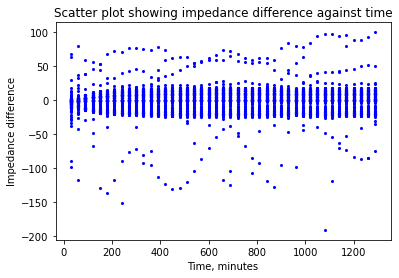

In [8]:
#Select columns in dataframe for x and y axes to generate a 2D scatter graph, and specify graph design
plt.scatter(transfer[1], transfer[2], color='blue', marker='.', linewidth=0.1)

#Title graph and label axes
plt.title('Scatter plot showing impedance difference against time')

plt.xlabel('Time, minutes')
plt.ylabel('Impedance difference')

### 4 - Plot data in three dimensions

In [9]:
#Enable interactive plotting
%matplotlib notebook

<IPython.core.display.Javascript object>


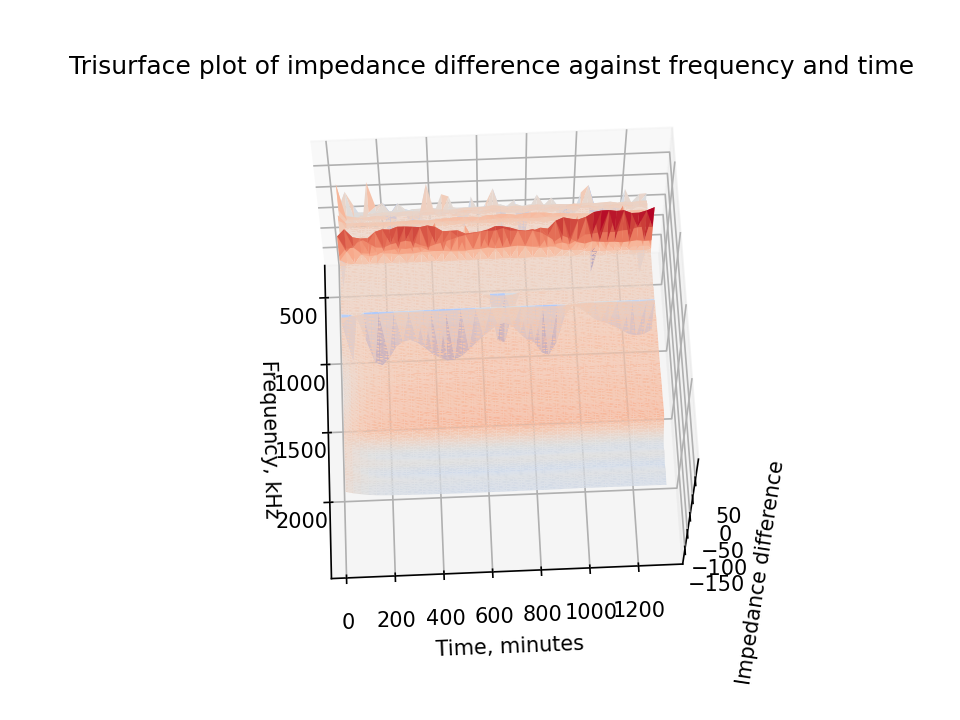

In [10]:
#Create figure and set up 3D axis
fig = plt.figure()
ax1 = plt.axes(projection='3d')

#Select columns in dataframe for each axis on the graph using iloc
X = transfer.iloc[:,0]
Y = transfer.iloc[:,1]
Z = transfer.iloc[:,2]

#Generate triangular surface plot from XYZ vectors, specify colour e.g. heatmap style, specify T/F anti-aliasing
ax1.plot_trisurf(X, Y, Z, 
                cmap = cm.coolwarm,
                antialiased = True)

#Title graph and label axes
ax1.set_title('Trisurface plot of impedance difference against frequency and time')

ax1.set_xlabel('Frequency, kHz')
ax1.set_ylabel('Time, minutes')
ax1.set_zlabel('Impedance difference')

plt.show()

<IPython.core.display.Javascript object>


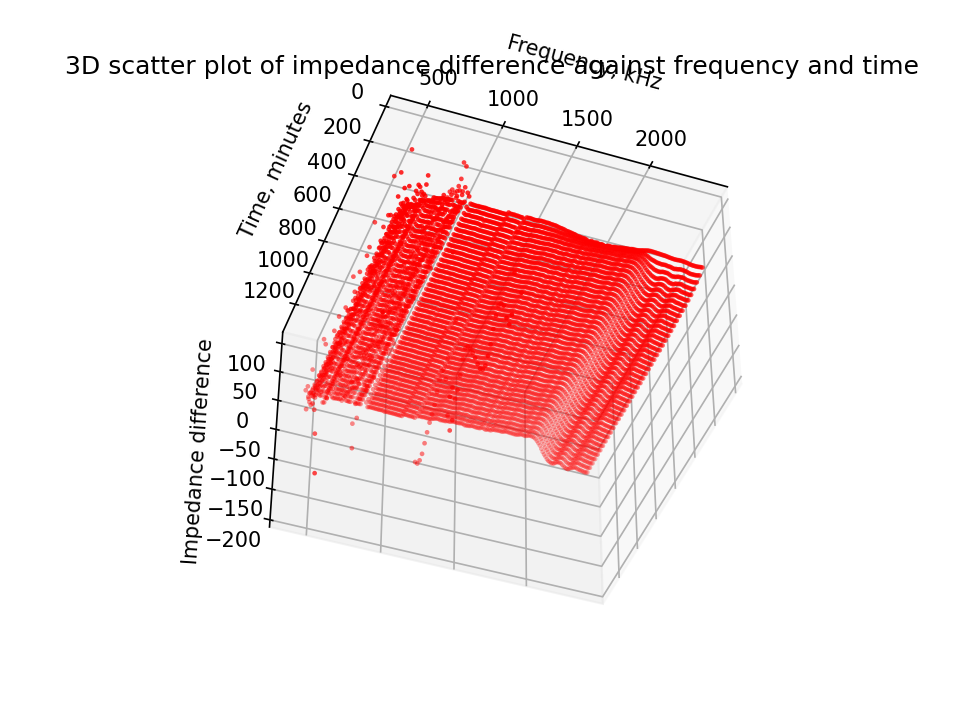

In [11]:
#Create figure and set up 3D axis
fig = plt.figure()
ax2 = plt.axes(projection='3d')

#Generate scatter plot using frequency, time, and impedance difference as xyz values
#specify graph design e.g. colour, linewidth
ax2.scatter(transfer[0], transfer[1], transfer[2], color='red', marker='.', linewidth=0.01)

#Title graph and label axes
ax2.set_title('3D scatter plot of impedance difference against frequency and time')

ax2.set_xlabel('Frequency, kHz')
ax2.set_ylabel('Time, minutes')
ax2.set_zlabel('Impedance difference')

plt.show()

<IPython.core.display.Javascript object>


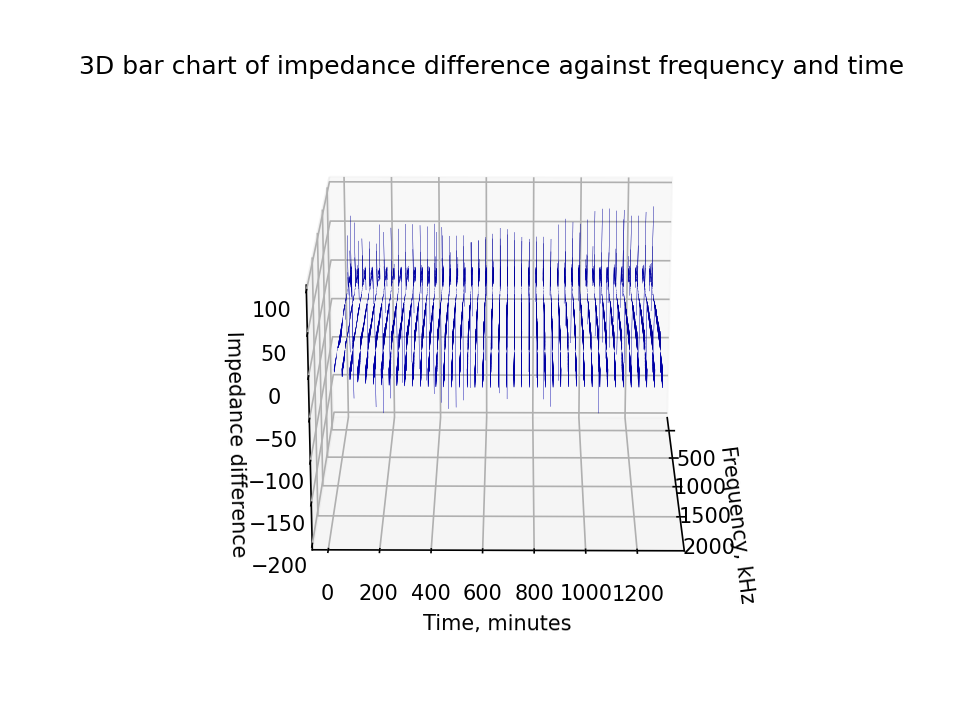

In [12]:
#Create figure and set up 3D axis
fig = plt.figure()
ax3 = plt.axes(projection='3d')

#Select first two columns from dataframe for x and y axes; 
#z is centered at zero and its value is the size of impedance difference for each data point
x3 = (transfer[0])
y3 = (transfer[1])
z3 = np.zeros(transfer[2].size)

#Set limits of z axis so it doesn't start at 0
ax3.set_zlim(-200,100)

#Delta x and y values are 1 because this is the depth of the bars in the x and y directions for each data point in the array
#the depth of the bar in the z direction is the size of the impedance difference
dx = np.ones(transfer[0].size)
dy = np.ones(transfer[1].size)
dz = transfer[2] 

#Generate a 3D bar chart using the xyz values and their depths, also alter chart design if desired
ax3.bar3d(x3, y3, z3, dx, dy, dz, color='blue')

#Title graph and label axes
ax3.set_title('3D bar chart of impedance difference against frequency and time')

ax3.set_xlabel('Frequency, kHz')
ax3.set_ylabel('Time, minutes')
ax3.set_zlabel('Impedance difference')

plt.show()